<a href="https://colab.research.google.com/github/I-ULISES-I/Colabfiles/blob/main/Pr%C3%A1ctica_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica #19. Ejercicios con EDA 2**

In [46]:
#Importación de las librerías.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#Lectura del archivo.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
df = pd.read_csv(url, header=None, names=column_names)

#Modificación del tipo de dato.
df['status'] = df['status'].astype('category')

#Selección de las columnas númericas.
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

## **Descripción de los Datos**

In [47]:
#Impresión de los detalles de las columnas.
print('Detalles de las columnas:')
print(df.info())

#Impresión de las estadísticas descriptivas.
print('\nEstadísticas descriptivas:')
print(df.describe())

#Impresión de la moda.
print('\nModa:')
print(df.mode().iloc[0])

#Impresión de los valores nulos.
print('\nValores nulos:')
print(df.isnull().sum())

Detalles de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     306 non-null    int64   
 1   year    306 non-null    int64   
 2   nodes   306 non-null    int64   
 3   status  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB
None

Estadísticas descriptivas:
              age        year       nodes
count  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144
std     10.803452    3.249405    7.189654
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     60.750000   65.750000    4.000000
max     83.000000   69.000000   52.000000

Moda:
age       52
year      58
nodes      0
status     1
Name: 0, dtype: int64

Valores nulos:
age       0
year      0
nodes     0
status    0
dtype: int64


## **Histogramas y PDFs**

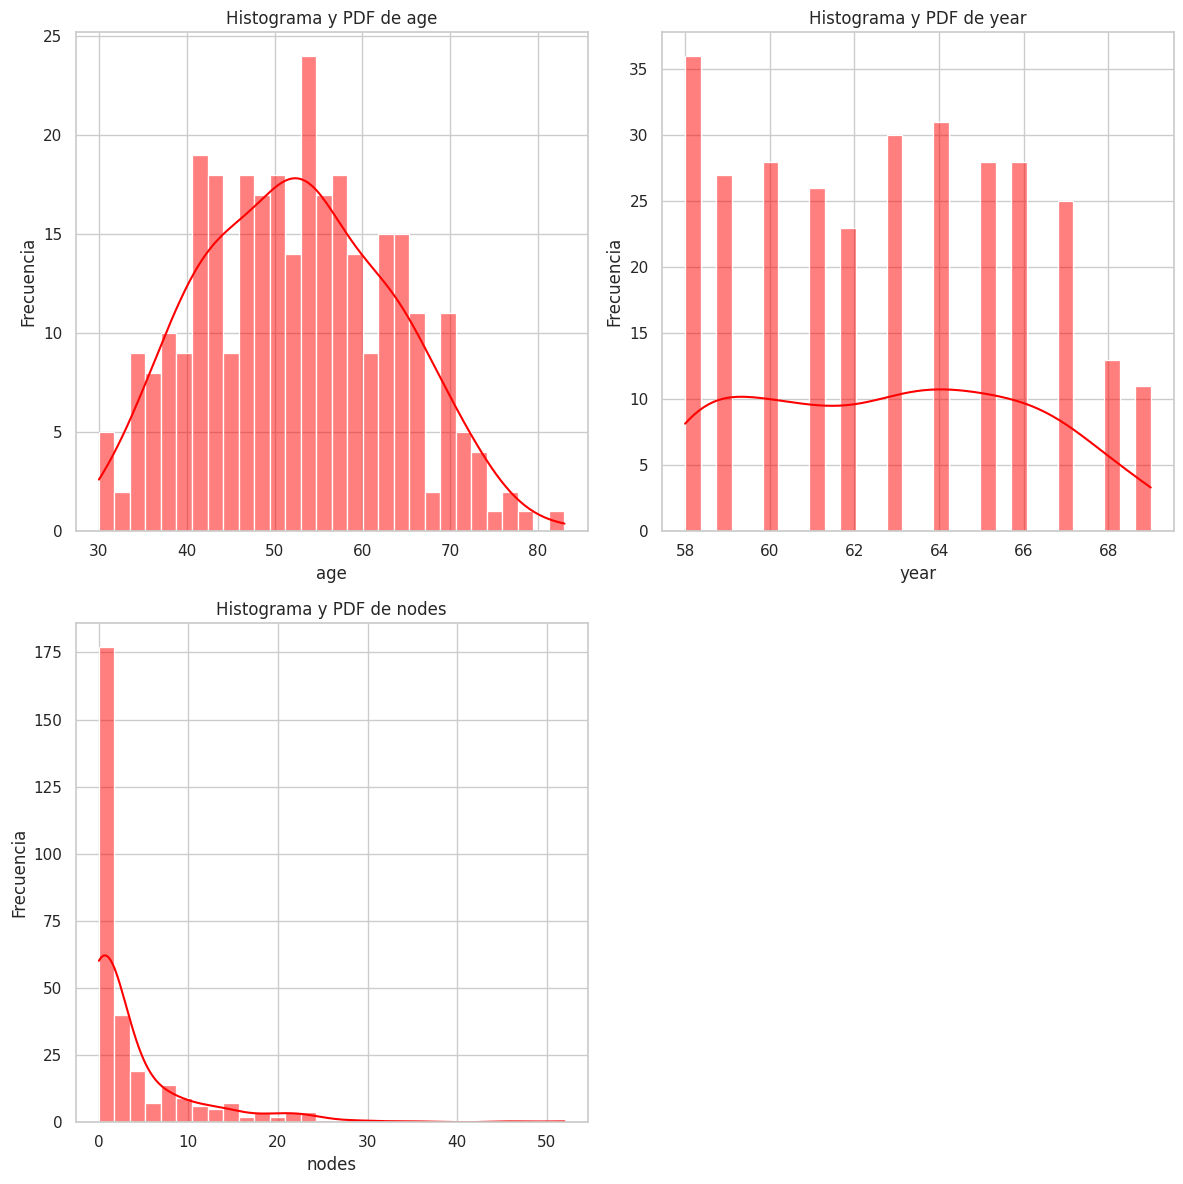

In [48]:
#Creación y diseño de los histogramas.
plt.figure(figsize=(12, 12))
for i, columna in enumerate(columnas_numericas, 1):
  plt.subplot(2, 2, i)
  sns.histplot(df[columna], kde=True, bins=30, color='red')
  plt.title(f'Histograma y PDF de {columna}')
  plt.xlabel(columna)
  plt.ylabel('Frecuencia')

#Impresión de los gráficos.
plt.tight_layout()
plt.show()

## **Gráfica de Barras**

<ipython-input-49-5e3517579b57>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=df, palette='viridis')


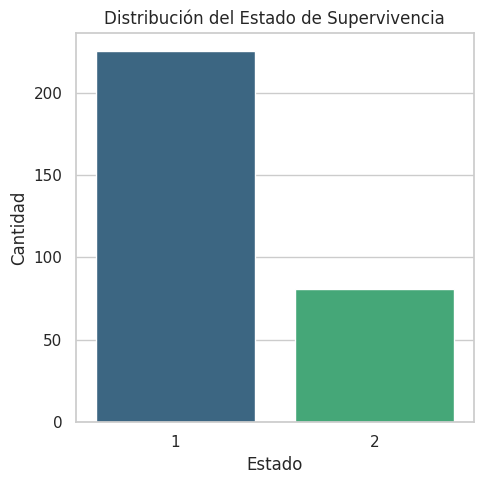

In [49]:
#Configuración del estilo del gráfico.
sns.set(style="whitegrid")

#Creación y diseño de la gráfica de barras.
plt.figure(figsize=(5, 5))
sns.countplot(x='status', data=df, palette='viridis')
plt.title('Distribución del Estado de Supervivencia')
plt.xlabel('Estado')
plt.ylabel('Cantidad')

#Impresión del gráfico.
plt.tight_layout()
plt.show()

## **Boxplots**

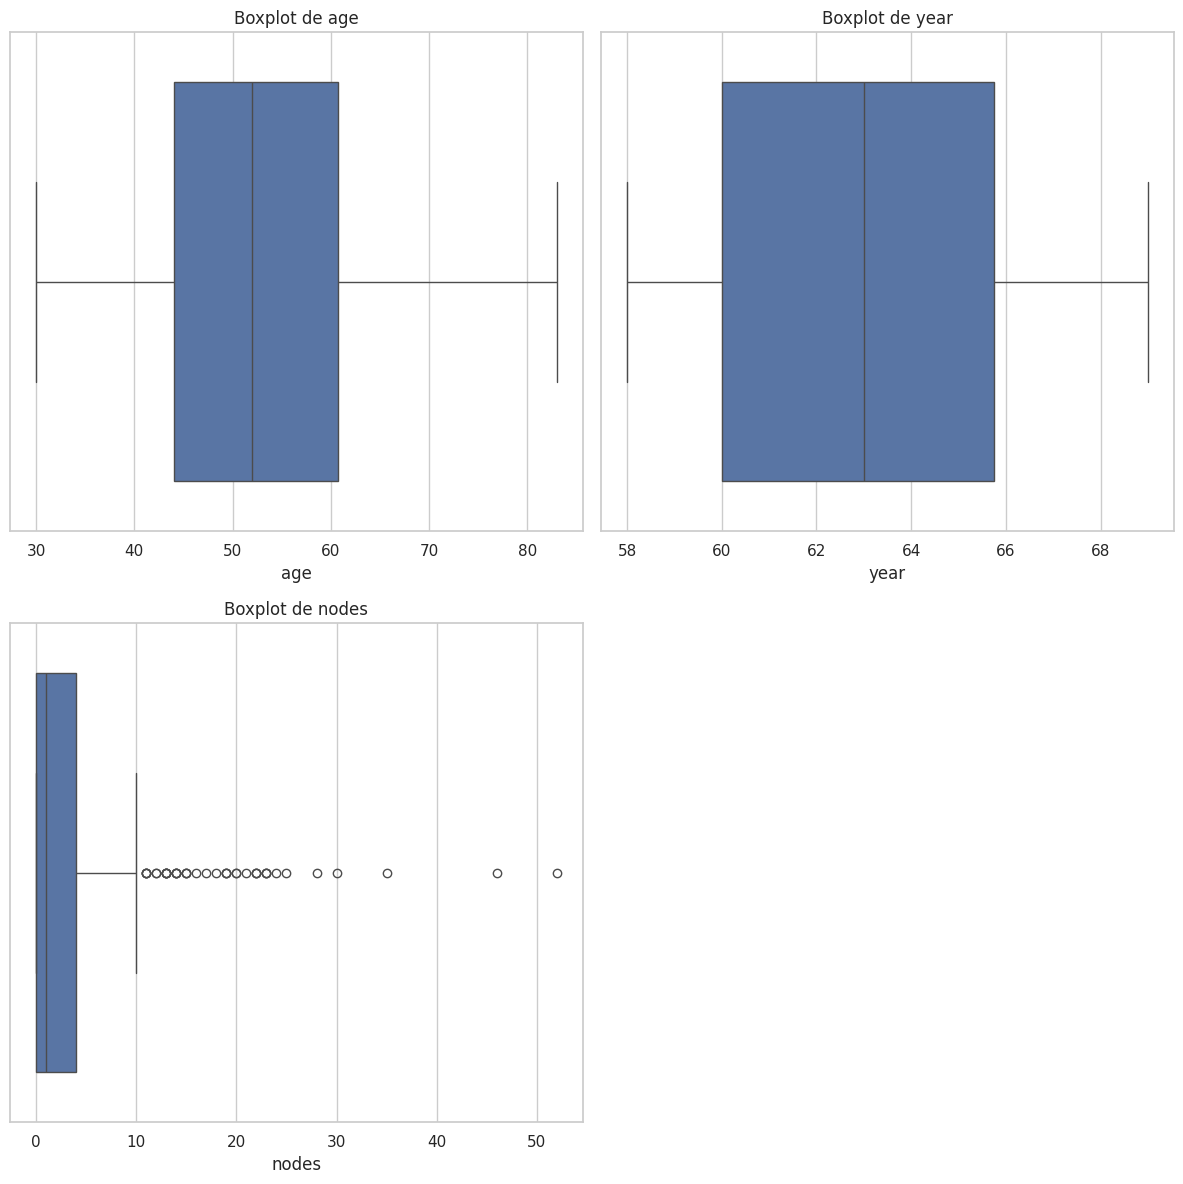

In [50]:
#Creación y diseño de los boxplots.
plt.figure(figsize=(12, 12))
for i, columna in enumerate(columnas_numericas, 1):
  plt.subplot(2, 2, i)
  sns.boxplot(x=df[columna])
  plt.title(f'Boxplot de {columna}')

#Impresión de los gráficos.
plt.tight_layout()
plt.show()

## **Matriz de Correlación y Mapa de Calor**

Matriz de correlación:
            age      year     nodes
age    1.000000  0.089529 -0.063176
year   0.089529  1.000000 -0.003764
nodes -0.063176 -0.003764  1.000000


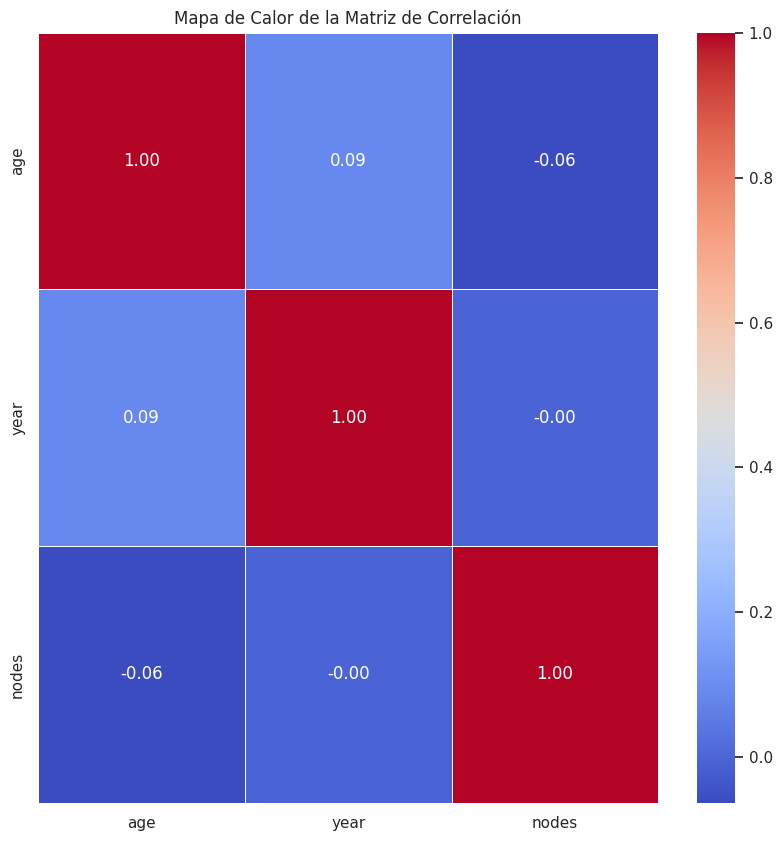

In [51]:
#Cálculo de la matriz de correlación.
matriz_correlacion = df[columnas_numericas].corr()

#Impresión de la matriz.
print('Matriz de correlación:')
print(matriz_correlacion)

#Creación y diseño del mapa de calor.
plt.figure(figsize=(10, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de la Matriz de Correlación')

#Impresión del gráfico.
plt.show()

## **Pairplot**

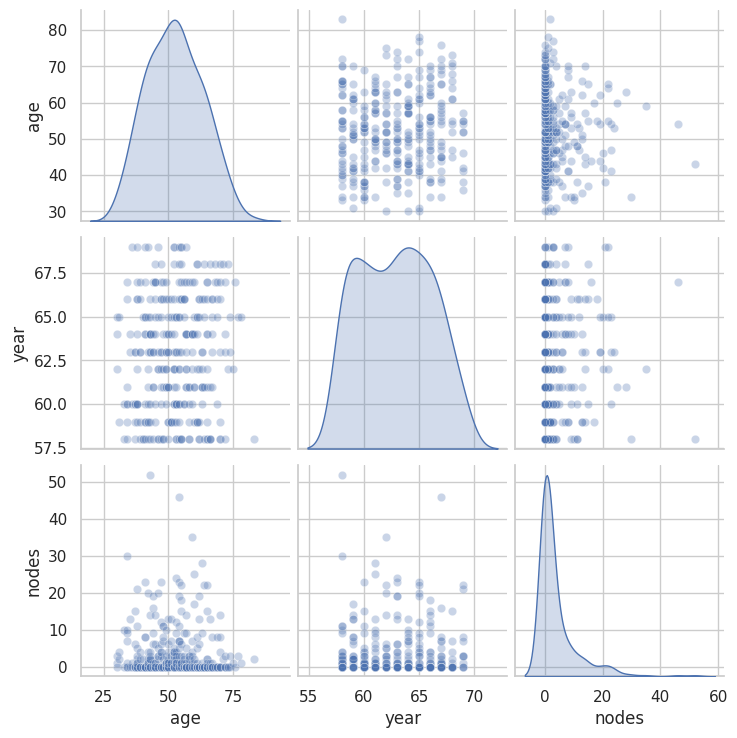

In [52]:
#Creación y diseño del pairplot.
sns.pairplot(df[columnas_numericas], plot_kws={'alpha': 0.3}, diag_kind='kde')

#Impresión del gráfico.
plt.show()

## **Pruebas de Normalidad y QQplot**

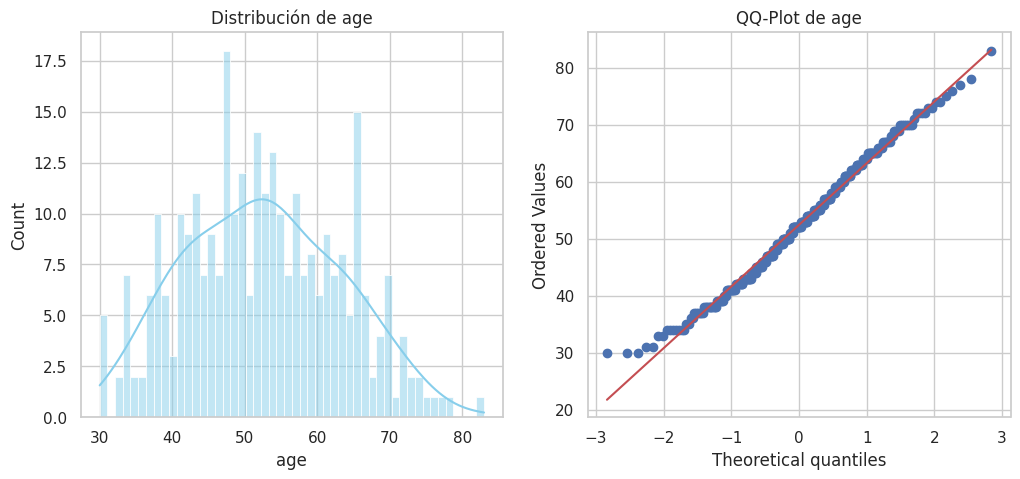


Pruebas de normalidad para: age
Shapiro-Wilk Test: p-valor = 0.02605
Kolmogorov-Smirnov Test: p-valor = 0.46980
Anderson-Darling Test: Estadístico = 0.73156
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos parecen normales.
  Al nivel de significancia 2.5%, los datos parecen normales.
  Al nivel de significancia 1.0%, los datos parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00780


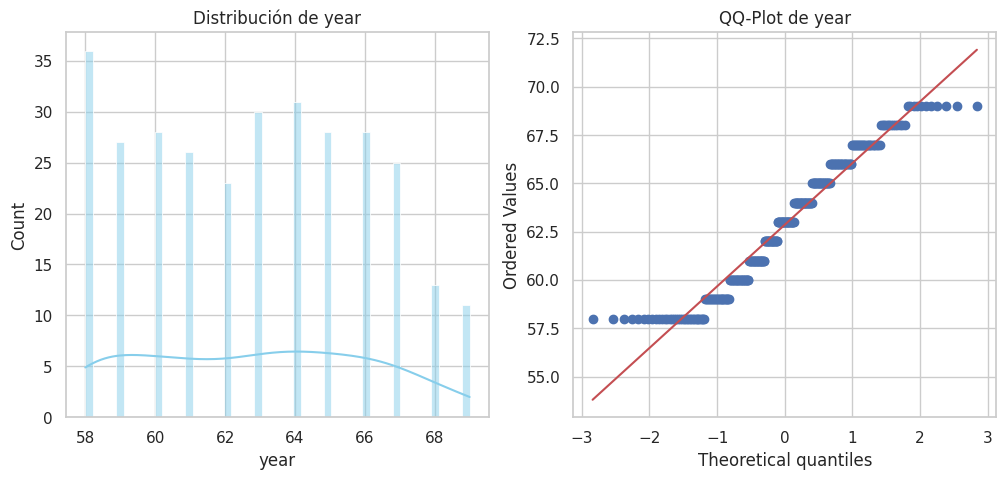


Pruebas de normalidad para: year
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00158
Anderson-Darling Test: Estadístico = 4.31374
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


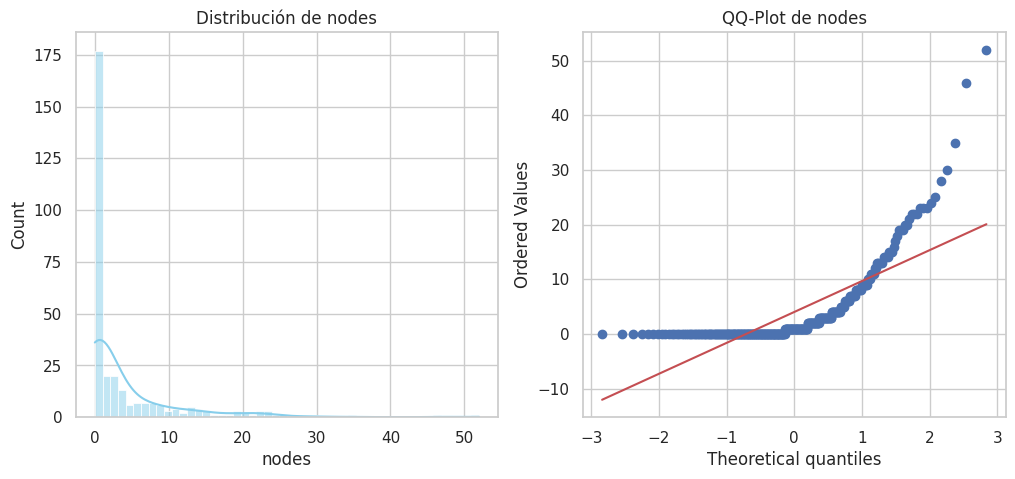


Pruebas de normalidad para: nodes
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 39.68662
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


In [53]:
#Función para calcular pruebas de normalidad.
def pruebas_normalidad(datos, nombre_columna):
  print(f"\nPruebas de normalidad para: {nombre_columna}")

  #Cálculo de Shapiro-Wilk.
  shapiro_test = stats.shapiro(datos.sample(min(5000, len(datos)), random_state=42))
  print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

  #Cálculo de Kolmogorov-Smirnov.
  ks_test = stats.kstest(datos, 'norm', args=(datos.mean(), datos.std()))
  print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

  #Cálculo de Anderson-Darling.
  anderson_test = stats.anderson(datos, dist='norm')
  print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
  for i in range(len(anderson_test.critical_values)):
    sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
    if anderson_test.statistic < cv:
      print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
    else:
      print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")

  #Cálculo de D'Agostino-Pearson.
  dagostino_test = stats.normaltest(datos)
  print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")

#Función para crear gráficos.
def graficos(datos, nombre_columna):
  plt.figure(figsize=(12, 5))

  #Creación y diseño del histograma.
  plt.subplot(1, 2, 1)
  sns.histplot(datos, bins=50, kde=True, color="skyblue")
  plt.title(f"Distribución de {nombre_columna}")

  #Creación y diseño del QQplot.
  plt.subplot(1, 2, 2)
  stats.probplot(datos, dist="norm", plot=plt)
  plt.title(f"QQ-Plot de {nombre_columna}")

  plt.show()

#Crear gráficos y calcular pruebas de normalidad por columna.
for columna in columnas_numericas:
    datos = df[columna]
    graficos(datos, columna)
    pruebas_normalidad(datos, columna)

## **Tratamiento de Datos Faltantes**

En base a la descripción de lo datos que se presenta al principio de esta práctica, se puede observar que no existen datos faltantes, por lo que se omite la repetición del EDA.